In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

#load_data 
df=pd.read_excel("MG_FC.xlsx")
df2=pd.read_excel("MG_WC.xlsx")
print(df.shape)
df.head(5)

(40, 12)


,Temperature (oC),Mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv (cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,38.4990,5.58600,3.5380,0.252000,0.000991,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,38.4963,5.49000,3.3480,0.465667,0.001321,NaN,0.000070,0.017186,0.053703,0.847885,0.332664
2,75,38.4937,5.39400,3.1580,0.679333,0.001650,NaN,0.000138,0.034372,0.107405,1.695766,0.665318
3,100,38.4910,5.29800,2.9680,0.893000,0.001980,NaN,0.000208,0.051557,0.161108,2.543651,0.997982
4,125,38.4873,5.11025,2.9195,1.015500,0.002822,NaN,0.000304,0.085168,0.174816,3.029762,1.847629


In [2]:
df2.head()

,Temperature (oC),Mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv (cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,38.1990,6.11200,3.21100,0.363000,0.001442,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,38.1963,6.00433,3.17433,0.903667,0.001558,NaN,0.000071,0.017616,0.011420,1.489441,0.080215
2,75,38.1937,5.89667,3.13767,1.444330,0.001673,NaN,0.000139,0.035231,0.022837,2.978871,0.160423
3,100,38.1910,5.78900,3.10100,1.985000,0.001789,NaN,0.000209,0.052847,0.034257,4.468320,0.240638
4,125,38.1860,5.69125,3.05200,2.294250,0.004464,NaN,0.000340,0.068840,0.049517,5.320248,2.096047


In [3]:
df.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv (cc/gm)'],axis= 'columns',inplace=True)

In [4]:
df2.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv (cc/gm)'],axis= 'columns',inplace=True)

In [5]:
df.rename(columns={'Temperature (oC)':'Temperature(°C)','Mass(gm) ':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [6]:
df2.rename(columns={'Temperature (oC)':'Temperature(°C)','Mass(gm) ':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [7]:
df

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,38.4990,5.586000,3.538000,0.252000
1,50,38.4963,5.490000,3.348000,0.465667
2,75,38.4937,5.394000,3.158000,0.679333
3,100,38.4910,5.298000,2.968000,0.893000
4,125,38.4873,5.110250,2.919500,1.015500
5,150,38.4835,4.922500,2.871000,1.138000
6,175,38.4797,4.734750,2.822500,1.260500
7,200,38.4760,4.547000,2.774000,1.383000
8,225,38.4597,4.507500,2.702750,1.529000
9,250,38.4435,4.468000,2.631500,1.675000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  40 non-null     int64  
 1   Mass             40 non-null     float64
 2   P-wave velocity  40 non-null     float64
 3   S-wave velocity  40 non-null     float64
 4   Porosity(%)      40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [9]:
df.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,512.500000,38.059137,2.982292,1.551327,3.127538
std,292.261299,0.660803,1.724334,1.091037,2.237651
min,25.000000,36.002000,0.515015,0.206006,0.252000
25%,268.750000,38.097750,1.248125,0.499249,1.784500
50%,512.500000,38.342750,3.438250,1.375300,3.034125
75%,756.250000,38.431350,4.438375,2.578062,3.417125
max,1000.000000,38.499000,5.586000,3.538000,10.856000


In [10]:
df.corr()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
Temperature(°C),1.000000,-0.780181,-0.985266,-0.982400,0.857574
Mass,-0.780181,1.000000,0.740636,0.671250,-0.947206
P-wave velocity,-0.985266,0.740636,1.000000,0.983201,-0.807078
S-wave velocity,-0.982400,0.671250,0.983201,1.000000,-0.778568
Porosity(%),0.857574,-0.947206,-0.807078,-0.778568,1.000000


In [11]:
df2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,38.1990,6.112000,3.211000,0.363000
1,50,38.1963,6.004330,3.174330,0.903667
2,75,38.1937,5.896670,3.137670,1.444330
3,100,38.1910,5.789000,3.101000,1.985000
4,125,38.1860,5.691250,3.052000,2.294250
5,150,38.1810,5.593500,3.003000,2.603500
6,175,38.1760,5.495750,2.954000,2.912750
7,200,38.1710,5.398000,2.905000,3.222000
8,225,38.1635,5.278000,2.901750,3.313750
9,250,38.1560,5.158000,2.898500,3.405500


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  40 non-null     int64  
 1   Mass             40 non-null     float64
 2   P-wave velocity  40 non-null     float64
 3   S-wave velocity  40 non-null     float64
 4   Porosity(%)      40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [13]:
df2.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,512.500000,37.955917,3.107071,1.806567,4.468764
std,292.261299,0.233548,1.947184,1.071327,2.384133
min,25.000000,37.500000,0.535932,0.321559,0.363000
25%,268.750000,37.704675,1.253130,0.751877,3.474312
50%,512.500000,38.088250,2.798500,1.679100,4.000375
75%,756.250000,38.150375,5.068000,2.896062,4.388250
max,1000.000000,38.199000,6.112000,3.211000,11.130000


In [14]:
#making a copy of each dataframe
data_MG_FC=df
data_MG_WC=df2

In [15]:
# #size of plot
# plt.subplots(figsize=(15,15))

# plt.plot(df.Temp,df.Phi,color='Red')
# plt.scatter(df.Temp,df.Phi,color='Red')
# plt.plot(df.Temp,df2.Phi,color='Blue')
# plt.scatter(df.Temp,df2.Phi,color='Blue')


# #curve representation
# plt.legend(['Furnace cooling','Water cooling'],fontsize=25)
# plt.xlabel("Temperature(oC)")
# plt.ylabel("Porosity(%)")
# plt.show()

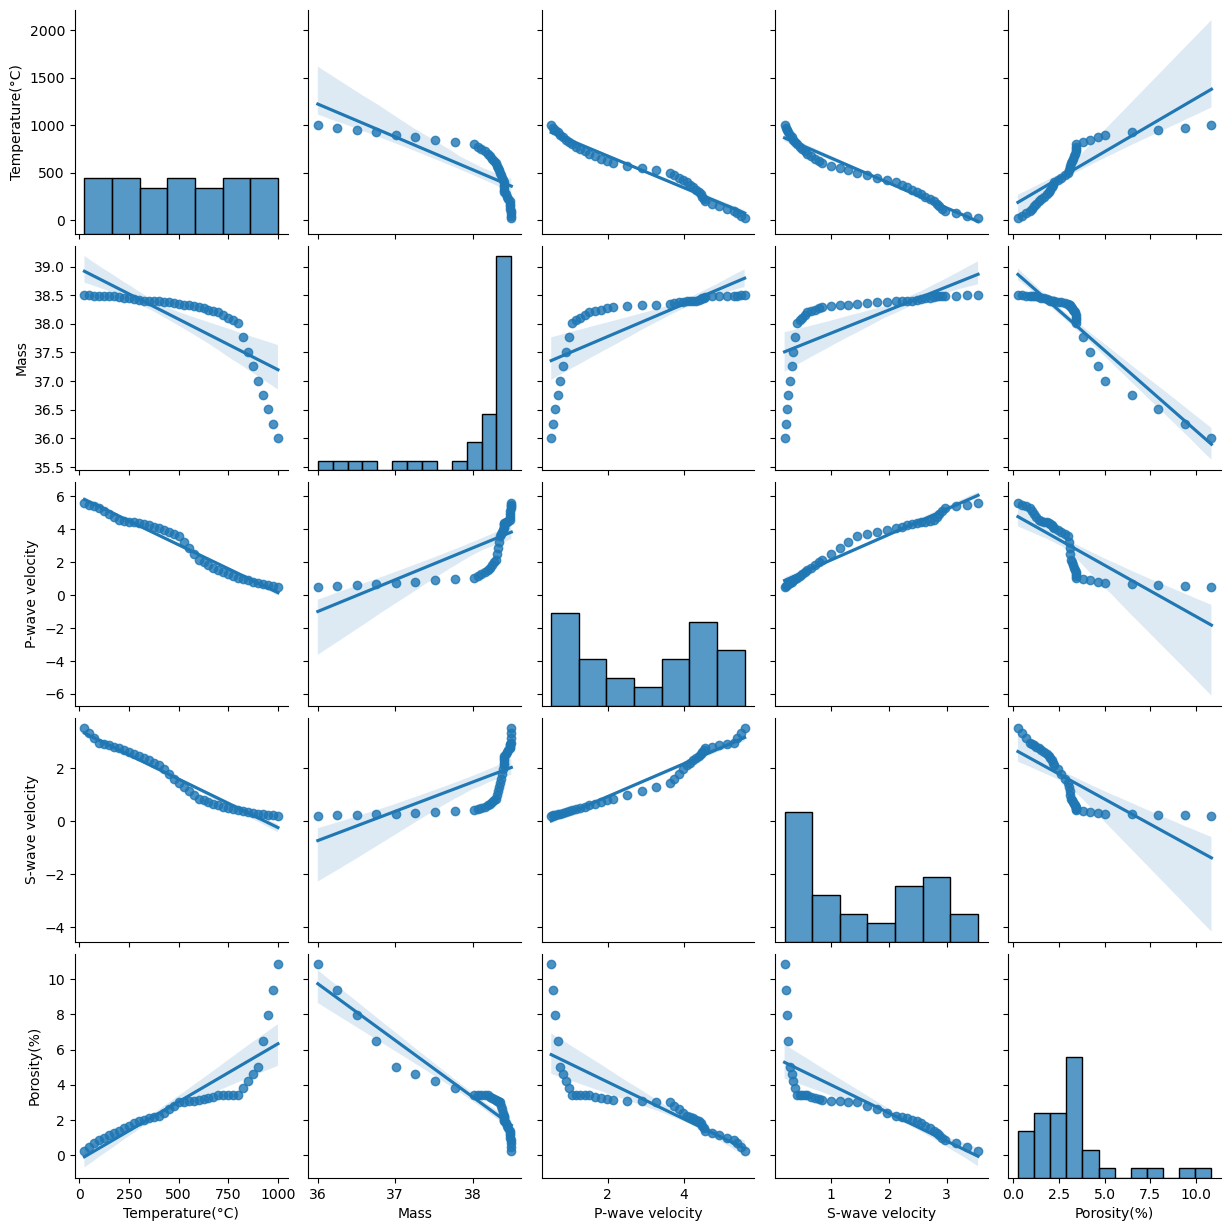

In [16]:
sns.pairplot(df,kind="reg") 


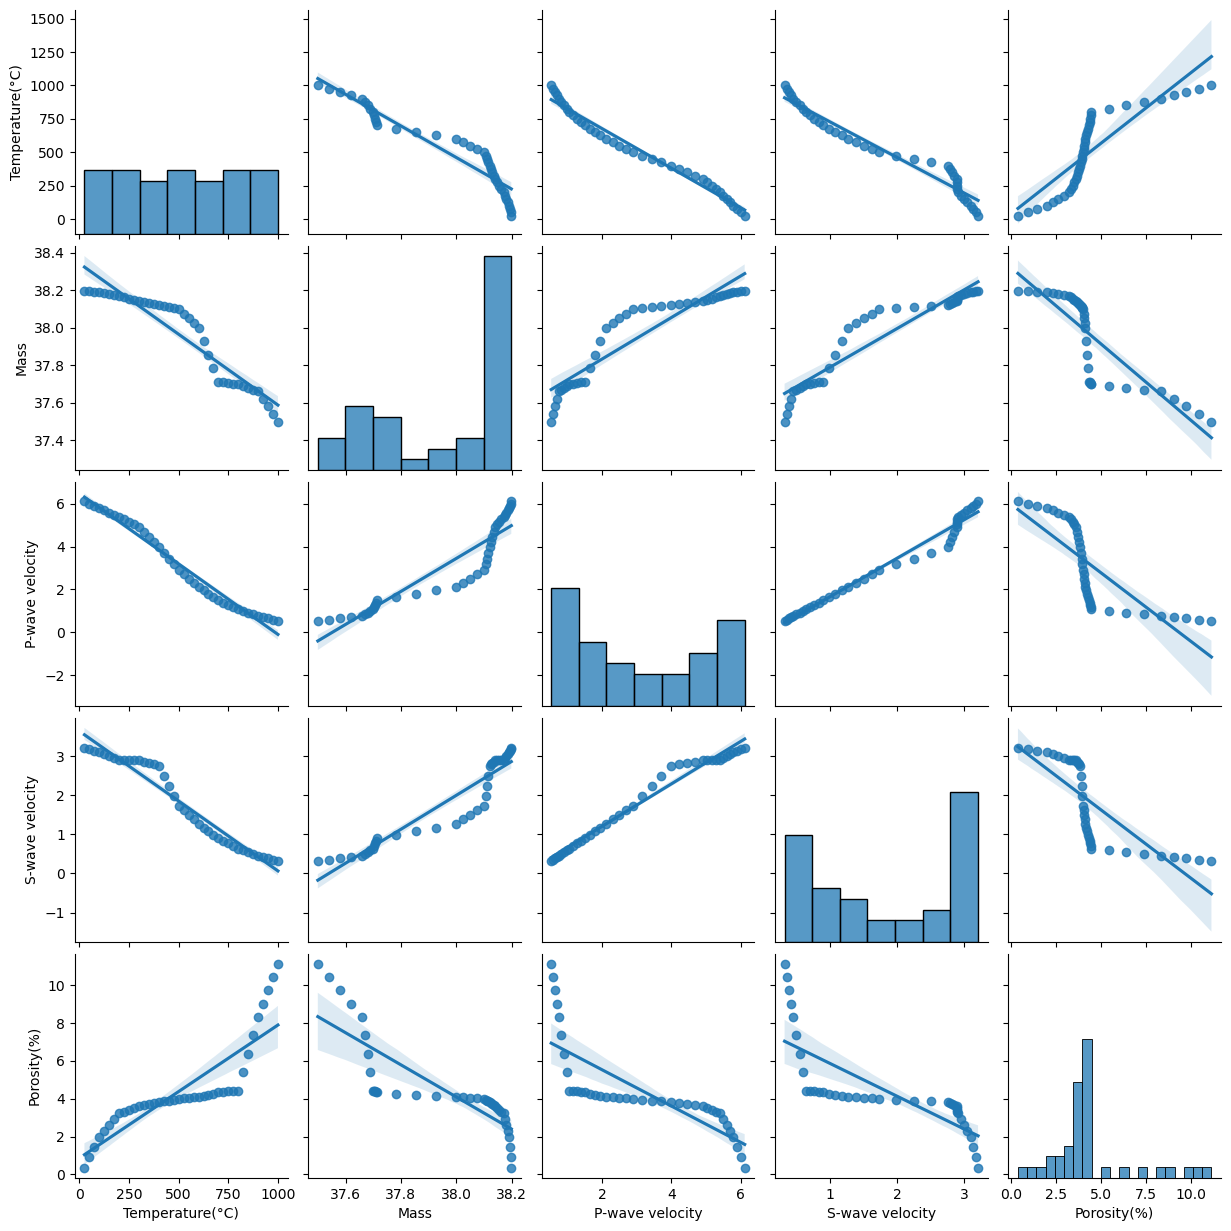

In [17]:
sns.pairplot(df2,kind="reg")

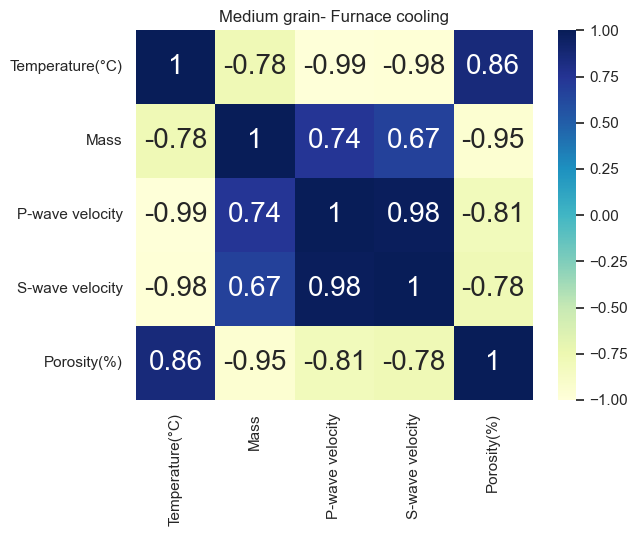

In [18]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Medium grain- Furnace cooling")
plt.show()

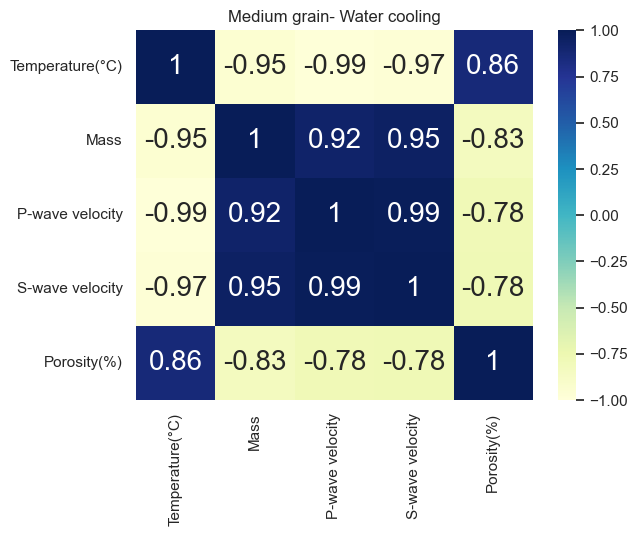

In [19]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Medium grain- Water cooling")
plt.show()

In [20]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs= df[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output= df[['Porosity(%)']]

In [21]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs2= df2[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output2= df2[['Porosity(%)']]



In [22]:
#input features(independent variable)
inputs.head(5)

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
0,25,38.4990,5.58600,3.5380
1,50,38.4963,5.49000,3.3480
2,75,38.4937,5.39400,3.1580
3,100,38.4910,5.29800,2.9680
4,125,38.4873,5.11025,2.9195


In [23]:
#output feature(dependent variable)
output.head(5)

,Porosity(%)
0,0.252000
1,0.465667
2,0.679333
3,0.893000
4,1.015500


In [24]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train,input_test,output_train,output_test=train_test_split(inputs,output,test_size=0.2,random_state=0)

In [25]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train2,input_test2,output_train2,output_test2=train_test_split(inputs2,output2,test_size=0.2,random_state=0)

In [26]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)

LinearRegression()

In [27]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(input_train2, output_train2)

LinearRegression()

In [28]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [122.77472682]
Coefficients: 
 [[ 1.98803912e-04 -3.15706044e+00  1.33652058e+00 -2.32825384e+00]]


In [29]:
print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

Intercept: 
 [-229.62257268]
Coefficients: 
 [[ 0.03857468  5.31158913  5.65059232 -2.67750005]]


In [30]:
phi_pred_MG_FC=regr.predict(input_test)

In [31]:
phi_pred_MG_WC=regr2.predict(input_test2)

In [32]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score=r2_score(output_test,phi_pred_MG_FC)

In [33]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score2=r2_score(output_test2,phi_pred_MG_WC)

In [34]:
score


0.8697818938141829

In [35]:
score2

0.2508953607039115

In [36]:
input_test


,Temperature(°C),Mass,P-wave velocity,S-wave velocity
22,575,38.3115,2.51450,1.005800
20,525,38.3365,3.25350,1.301400
25,650,38.2490,1.82325,0.729300
4,125,38.4873,5.11025,2.919500
10,275,38.4273,4.42850,2.560250
15,400,38.3990,4.08000,2.133000
28,725,38.1540,1.38889,0.555555
11,300,38.4110,4.38900,2.489000


In [37]:
input_test2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
22,575,38.0245,2.30600,1.383600
20,525,38.0755,2.70000,1.620000
25,650,37.8555,1.80320,1.081920
4,125,38.1860,5.69125,3.052000
10,275,38.1485,5.03800,2.895250
15,400,38.1210,3.97700,2.756000
28,725,37.7088,1.38883,0.833298
11,300,38.1410,4.91800,2.892000


In [38]:
measured_MG_FC=output_test
measured_MG_WC=output_test2


In [39]:
measured_MG_FC=measured_MG_FC.to_numpy()
measured_MG_WC=measured_MG_WC.to_numpy()


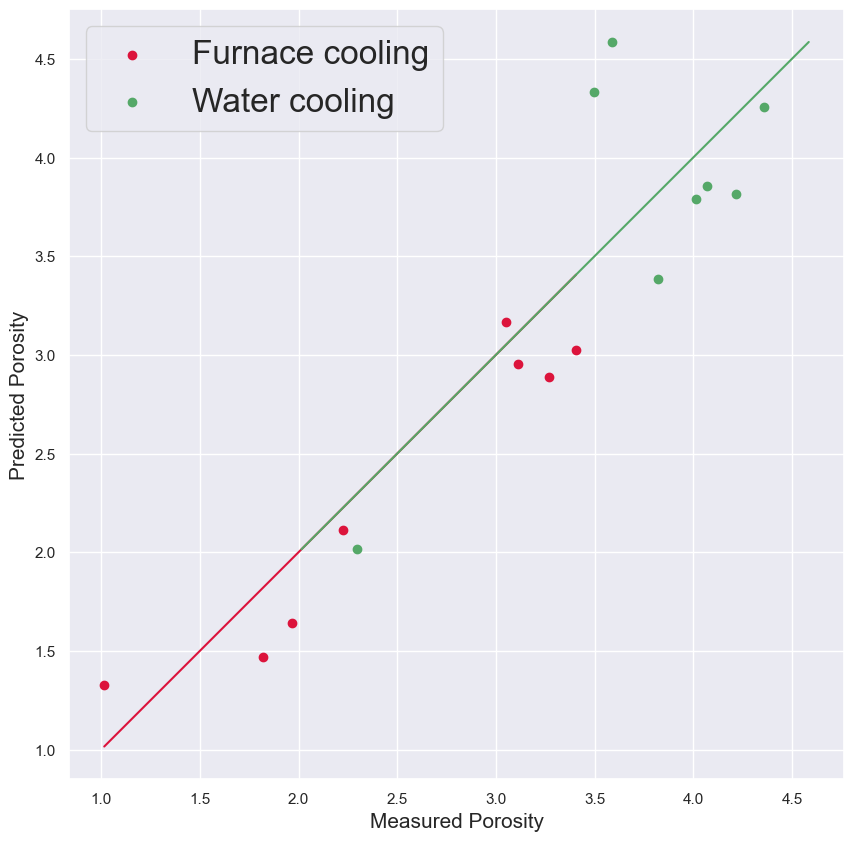

In [40]:

predicted_value=phi_pred_MG_FC
predicted_value2=phi_pred_MG_WC
measured=measured_MG_FC
measured2=measured_MG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [41]:
coef_table = pd.DataFrame(list(input_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regr.coef_.transpose())


In [42]:
coef_table2 = pd.DataFrame(list(input_train2.columns)).copy()
coef_table2.insert(len(coef_table2.columns),"Coefs",regr2.coef_.transpose())


In [43]:
coef_table



,0,Coefs
0,Temperature(°C),0.000199
1,Mass,-3.157060
2,P-wave velocity,1.336521
3,S-wave velocity,-2.328254


In [44]:
coef_table2

,0,Coefs
0,Temperature(°C),0.038575
1,Mass,5.311589
2,P-wave velocity,5.650592
3,S-wave velocity,-2.677500


In [45]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf.fit(input_train, output_train.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [46]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf2 = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf2.fit(input_train2, output_train2.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [47]:
RF_pred_MG_FC = clf.predict(input_test) # test the output by changing values
RF_pred_MG_WC = clf2.predict(input_test2) # test the output by changing values

In [48]:
from sklearn.metrics import r2_score 

score_RF=r2_score(output_test,RF_pred_MG_FC)
score_RF

0.9950541538215614

In [49]:
from sklearn.metrics import r2_score 

score_RF2=r2_score(output_test2,RF_pred_MG_WC)
score_RF2

0.9951609810067286

Model using Random forest fits quite well !

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


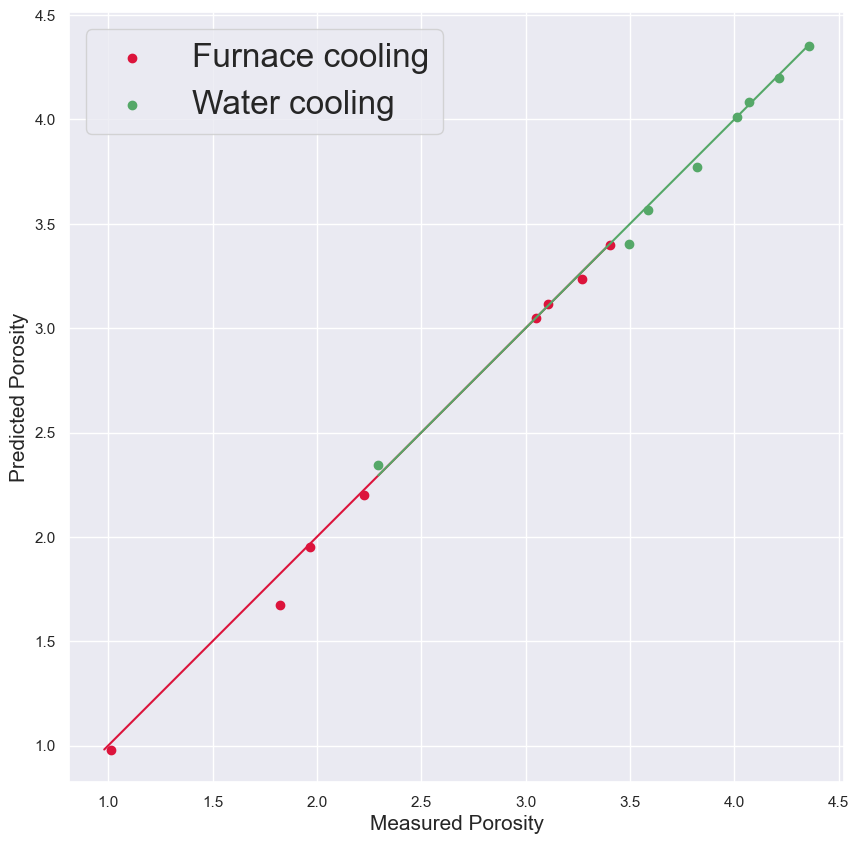

In [50]:
predicted_value=RF_pred_MG_FC
predicted_value2=RF_pred_MG_WC
measured=measured_MG_FC
measured2=measured_MG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

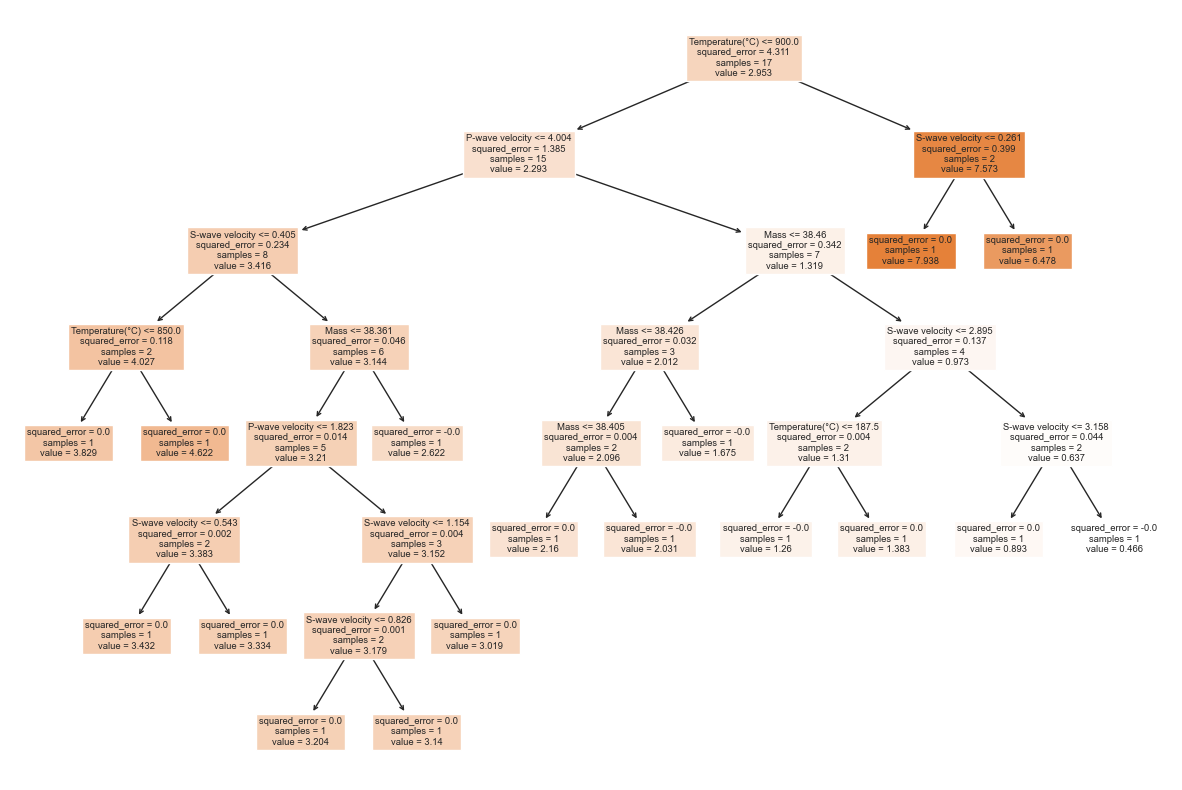

In [51]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[10],feature_names=df.columns,filled=True)
plt.savefig('out.pdf')

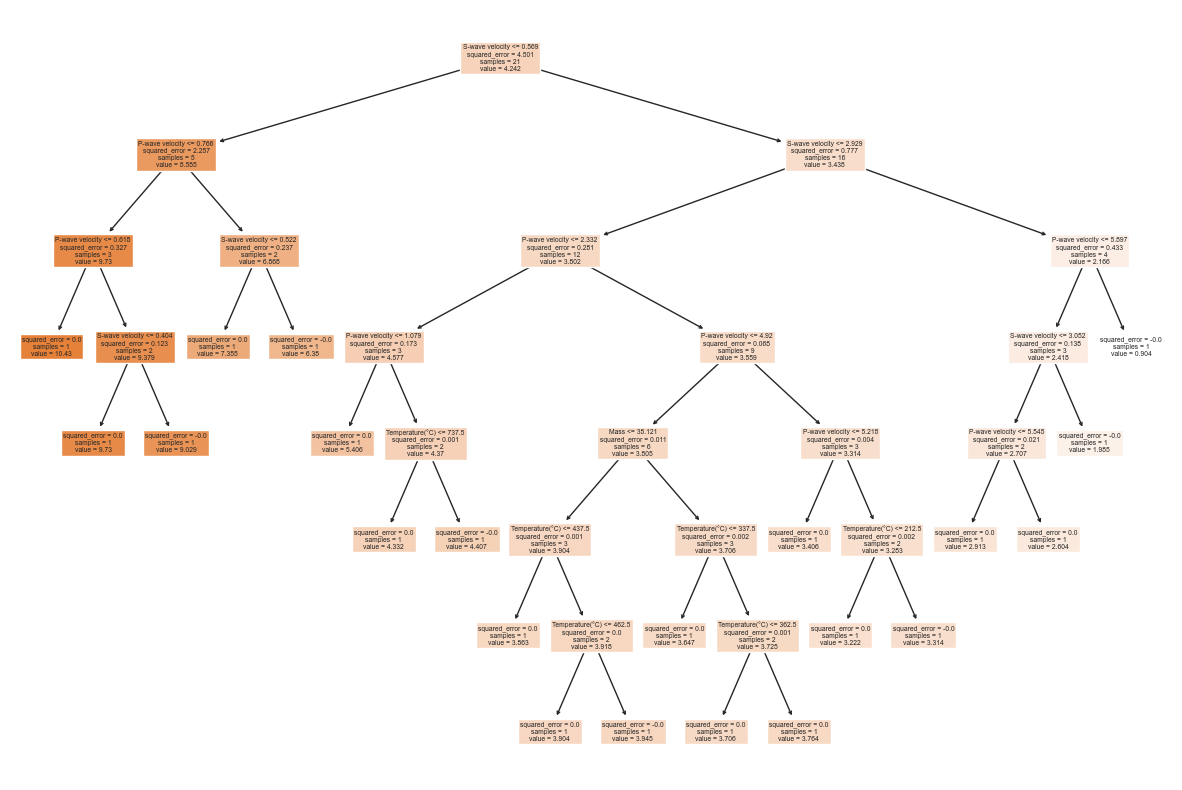

In [52]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2.estimators_[1],feature_names=df2.columns,filled=True)
plt.savefig('out2.pdf')

In [53]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn.fit(input_train, output_train)
knn_pred_MG_FC=knn.predict(input_test)


score_knn=r2_score(output_test,knn_pred_MG_FC)
score_knn

0.9966304918819079

In [54]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn2 = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn2.fit(input_train2, output_train2)
knn_pred_MG_WC=knn2.predict(input_test2)


score_knn2=r2_score(output_test2,knn_pred_MG_WC)
score_knn2

0.9931229634832014

In [55]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(input_train, output_train)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [56]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2.fit(input_train2, output_train2)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [57]:
svr_pred_MG_FC=regressor.predict(input_test)
svr_pred_MG_WC=regressor2.predict(input_test2)

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


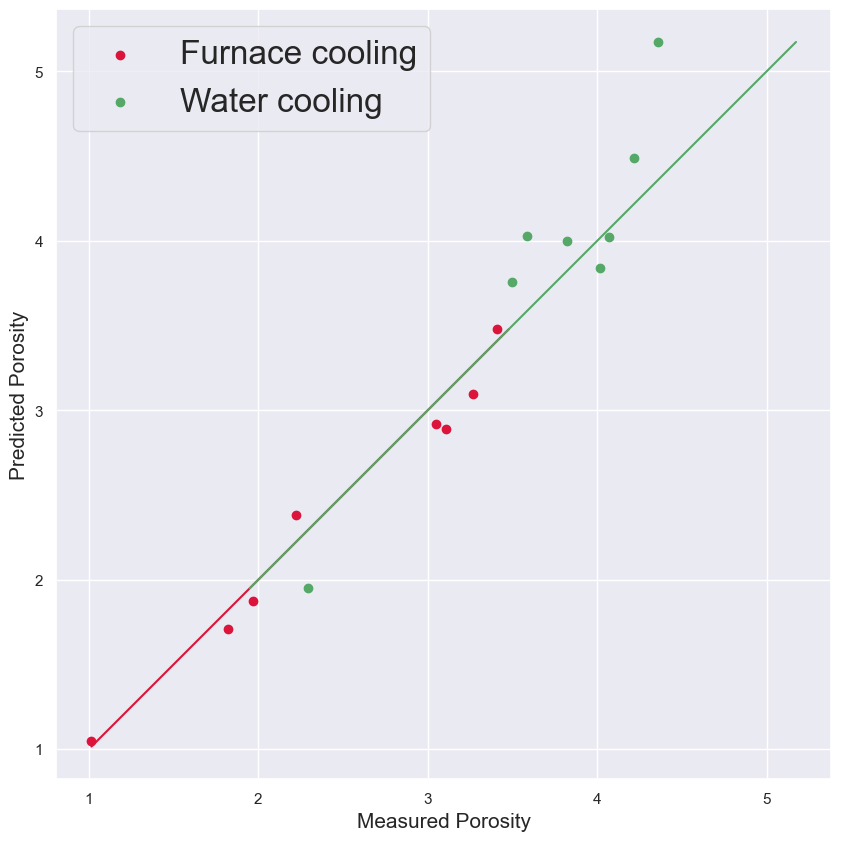

In [58]:
predicted_value=svr_pred_MG_FC
predicted_value2=svr_pred_MG_WC
measured=measured_MG_FC
measured2=measured_MG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [59]:
mse=mean_squared_error(output_test,svr_pred_MG_FC)
rmse=np.sqrt(mse)
rmse

0.13458541209247696

In [60]:
mse2=mean_squared_error(output_test2,svr_pred_MG_WC)
rmse2=np.sqrt(mse2)
rmse2

0.38515725932394934

In [61]:
from sklearn.metrics import r2_score 

score_svr=r2_score(output_test,svr_pred_MG_FC)
score_svr

0.9716355995060185

In [62]:
from sklearn.metrics import r2_score 

score_svr2=r2_score(output_test2,svr_pred_MG_WC)
score_svr2

0.6006643771241329

In [63]:
regressor.coef_


array([[ 0.00585635, -1.65325495,  0.57771356, -0.2178375 ]])

In [64]:
regressor2.coef_

array([[ 0.02260211,  0.21203671,  2.44181916, -0.12170701]])

In [65]:
regressor.intercept_


array([61.63000843])

In [66]:
regressor2.intercept_

array([-22.49798085])

In [67]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train, output_train)

y_pred_MG_FC = xgb_model.predict(input_test)

mse=mean_squared_error(output_test, y_pred_MG_FC)

print(np.sqrt(mse))

[09:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.10335798155367282


In [68]:
from sklearn.metrics import r2_score 

score_xgb=r2_score(output_test,y_pred_MG_FC)
score_xgb

0.9832711660415343

In [69]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train2, output_train2)

y_pred_MG_WC = xgb_model.predict(input_test2)

mse=mean_squared_error(output_test2, y_pred_MG_WC)

print(np.sqrt(mse))

[09:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.12081921931026676


In [70]:
from sklearn.metrics import r2_score 

score_xgb2=r2_score(output_test2,y_pred_MG_WC)
score_xgb2

0.9607053044585482

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


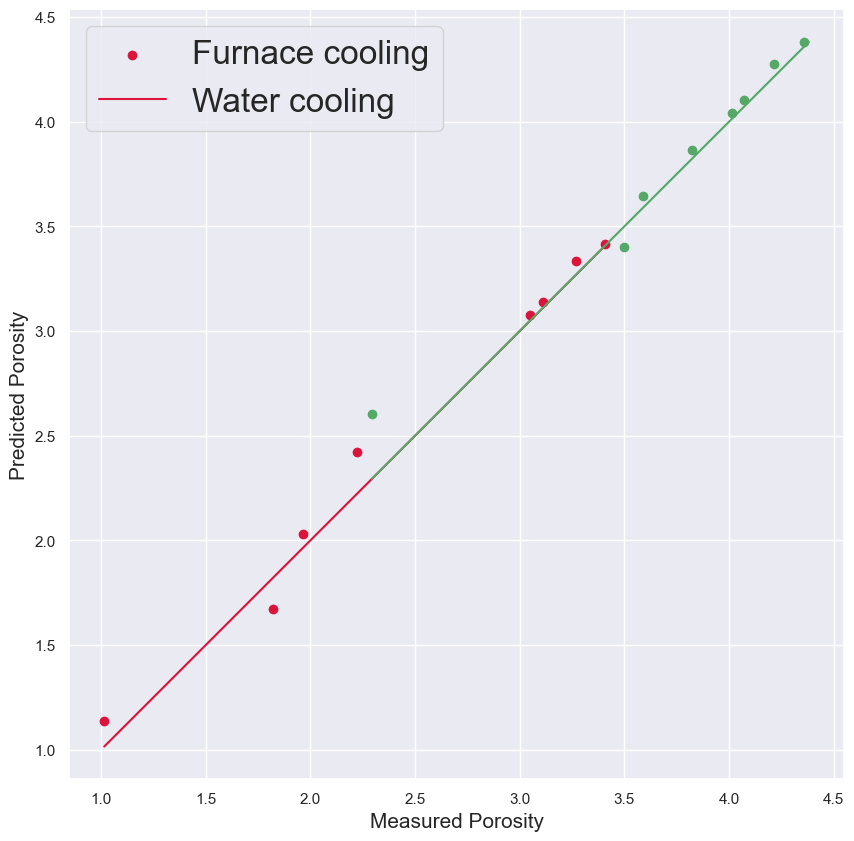

In [71]:
predicted_value=y_pred_MG_FC
predicted_value2=y_pred_MG_WC
measured=measured_MG_FC
measured2=measured_MG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')


p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))

plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)
plt.axis('equal')


plt.show()

In [72]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#Furnace cooling
%store phi_pred_MG_FC
%store RF_pred_MG_FC
%store svr_pred_MG_FC
%store y_pred_MG_FC
%store knn_pred_MG_FC

Stored 'phi_pred_MG_FC' (ndarray)
Stored 'RF_pred_MG_FC' (ndarray)
Stored 'svr_pred_MG_FC' (ndarray)
Stored 'y_pred_MG_FC' (ndarray)
Stored 'knn_pred_MG_FC' (ndarray)


In [73]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#Water cooling
%store phi_pred_MG_WC
%store RF_pred_MG_WC
%store svr_pred_MG_WC
%store y_pred_MG_WC
%store knn_pred_MG_WC

Stored 'phi_pred_MG_WC' (ndarray)
Stored 'RF_pred_MG_WC' (ndarray)
Stored 'svr_pred_MG_WC' (ndarray)
Stored 'y_pred_MG_WC' (ndarray)
Stored 'knn_pred_MG_WC' (ndarray)


In [74]:
#measured data ,i.e. output_test data 
#furnace cooling
%store measured_MG_FC

#water cooling
%store measured_MG_WC

Stored 'measured_MG_FC' (ndarray)
Stored 'measured_MG_WC' (ndarray)


In [75]:
%store data_MG_FC
%store data_MG_WC


Stored 'data_MG_FC' (DataFrame)
Stored 'data_MG_WC' (DataFrame)
